# Lab 1: Vacuum field optimisation

Let's begin by installing the necessary dependencies

In [1]:
import sys
!{sys.executable} -m pip install --upgrade numpy scipy
!{sys.executable} -m pip install plotly pandas
!{sys.executable} -m pip install -vvv --no-cache-dir git+https://github.com/florianwechsung/PyPlasmaOpt@fw/riskaverse

Uninstalling tensorflow-2.3.0:
  Successfully uninstalled tensorflow-2.3.0
Requirement already up-to-date: numpy in /Users/fw18/.pyenv/versions/3.7.7/lib/python3.7/site-packages (1.19.1)
Requirement already up-to-date: scipy in /Users/fw18/.pyenv/versions/3.7.7/lib/python3.7/site-packages (1.5.2)
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
Created temporary directory: /private/var/folders/pg/ryrpkdjd0yjgxhnl4f6m9qw80000gp/T/pip-ephem-wheel-cache-cp69qcgv
Created temporary directory: /private/var/folders/pg/ryrpkdjd0yjgxhnl4f6m9qw80000gp/T/pip-req-tracker-iioxakac
Created requirements tracker '/private/var/folders/pg/ryrpkdjd0yjgxhnl4f6m9qw80000gp/T/pip-req-tracker-iioxakac'
Created temporary directory: /private/var/folders/pg/ryrpkdjd0yjgxhnl4f6m9qw80000gp/T/pip-install-iu8c1ui4
  Created temporary directory: /private/var/folders/pg/ryrpkdjd0yjgxhnl4f6m9qw80000gp/T/pip-req-build-n8

  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.15-x86_64-3.7
  creating build/lib.macosx-10.15-x86_64-3.7/pyplasmaopt
  copying pyplasmaopt/logging.py -> build/lib.macosx-10.15-x86_64-3.7/pyplasmaopt
  copying pyplasmaopt/objective.py -> build/lib.macosx-10.15-x86_64-3.7/pyplasmaopt
  copying pyplasmaopt/cvar.py -> build/lib.macosx-10.15-x86_64-3.7/pyplasmaopt
  copying pyplasmaopt/__init__.py -> build/lib.macosx-10.15-x86_64-3.7/pyplasmaopt
  copying pyplasmaopt/curve.py -> build/lib.macosx-10.15-x86_64-3.7/pyplasmaopt
  copying pyplasmaopt/problems.py -> build/lib.macosx-10.15-x86_64-3.7/pyplasmaopt
  copying pyplasmaopt/quasi_symmetric_field.py -> build/lib.macosx-10.15-x86_64-3.7/pyplasmaopt
  copying pyplasmaopt/coils.py -> build/lib.macosx-10.15-x86_64-3.7/pyplasmaopt
  copying pyplasmaopt/stochastic_objective.py -> build/lib.macosx-10.15-x86_64-3.7/pyplasmaopt
  copying pyplasmaopt/biotsavart.py -> build/lib.macosx-10.15-

https://pypi.org:443 "GET /simple/pip/ HTTP/1.1" 200 14137
Analyzing links from page https://pypi.org/simple/pip/
  Found link https://files.pythonhosted.org/packages/3d/9d/1e313763bdfb6a48977b65829c6ce2a43eaae29ea2f907c8bbef024a7219/pip-0.2.tar.gz#sha256=88bb8d029e1bf4acd0e04d300104b7440086f94cc1ce1c5c3c31e3293aee1f81 (from https://pypi.org/simple/pip/), version: 0.2
  Found link https://files.pythonhosted.org/packages/18/ad/c0fe6cdfe1643a19ef027c7168572dac6283b80a384ddf21b75b921877da/pip-0.2.1.tar.gz#sha256=83522005c1266cc2de97e65072ff7554ac0f30ad369c3b02ff3a764b962048da (from https://pypi.org/simple/pip/), version: 0.2.1
  Found link https://files.pythonhosted.org/packages/17/05/f66144ef69b436d07f8eeeb28b7f77137f80de4bf60349ec6f0f9509e801/pip-0.3.tar.gz#sha256=183c72455cb7f8860ac1376f8c4f14d7f545aeab8ee7c22cd4caf79f35a2ed47 (from https://pypi.org/simple/pip/), version: 0.3
  Found link https://files.pythonhosted.org/packages/0a/bb/d087c9a1415f8726e683791c0b2943c53f2b76e69f527f2e2b2e

  Skipping link: yanked for reason: <none given>: https://files.pythonhosted.org/packages/60/65/16487a7c4e0f95bb3fc89c2e377be331fd496b7a9b08fd3077de7f3ae2cf/pip-20.0-py2.py3-none-any.whl#sha256=eea07b449d969dbc8c062c157852cf8ed2ad1b8b5ac965a6b819e62929e41703 (from https://pypi.org/simple/pip/) (requires-python:>=2.7,!=3.0.*,!=3.1.*,!=3.2.*,!=3.3.*,!=3.4.*)
  Skipping link: yanked for reason: <none given>: https://files.pythonhosted.org/packages/8c/5c/c18d58ab5c1a702bf670e0bd6a77cd4645e4aeca021c6118ef850895cc96/pip-20.0.tar.gz#sha256=5128e9a9401f1d16c1d15b2ed766a79d7813db1538428d0b0ce74838249e3a41 (from https://pypi.org/simple/pip/) (requires-python:>=2.7,!=3.0.*,!=3.1.*,!=3.2.*,!=3.3.*,!=3.4.*)
  Found link https://files.pythonhosted.org/packages/57/36/67f809c135c17ec9b8276466cc57f35b98c240f55c780689ea29fa32f512/pip-20.0.1-py2.py3-none-any.whl#sha256=b7110a319790ae17e8105ecd6fe07dbcc098a280c6d27b6dd7a20174927c24d7 (from https://pypi.org/simple/pip/) (requires-python:>=2.7,!=3.0.*,!=3.1

In [1]:
from pyplasmaopt import *

Now we can start by setting up a first simple optimisation problem

In [2]:
nfp = 2 # number of rotations
ppp = 20 # number of quadrature points per fourier period
# let's get some initial data
(coils, currents, expansion_axis, eta_bar) = get_24_coil_data(nfp=nfp, ppp=ppp, at_optimum=False)
# and now let's turn this into a Stellarator
stellarator = CoilCollection(coils, currents, nfp, True)

In [3]:
# Specify a target iota and target lengths for the coils and the axis
iota_target = 0.103
coil_length_target = 4.398229715025710
magnetic_axis_length_target = 6.356206812106860
# and lastly, let's pick an initial guess for eta_bar
eta_bar = -2.25

Now we're ready to build our objective

In [4]:
obj = SimpleNearAxisQuasiSymmetryObjective(
        stellarator, expansion_axis, iota_target, eta_bar=eta_bar,
        coil_length_target=coil_length_target, magnetic_axis_length_target=magnetic_axis_length_target,
        curvature_weight=0, torsion_weight=0,
        tikhonov_weight=0, arclength_weight=0, sobolev_weight=0,
        minimum_distance=0, distance_weight=0)


The objective can be evaluate at a point `x` by calling
    
    obj.update(x)


In [7]:
x = obj.x0
obj.update(x)
print('f(x) =', obj.res)
print('gradf(x) =', obj.dres)

f(x) = 11.070805258492534
gradf(x) = [-2.00576690e-01 -6.41391502e+00  1.76918105e+01 -2.93361599e+01
 -7.72285199e+00 -1.54610344e+01  2.68805453e+01  6.39893377e+00
  1.22845587e+01  1.21425535e+01  1.19076705e+01  1.16488503e+01
  1.14338243e+01  1.13140574e+01  0.00000000e+00  1.81427314e-18
 -1.42103336e-16 -5.54349800e-33 -9.23916334e-33  5.98952658e-33
 -8.92057150e-34  0.00000000e+00 -2.09325297e-17 -2.46849744e-17
 -2.35757961e-33 -2.99476329e-33  1.91155104e-33  1.40180409e-33
  0.00000000e+00 -1.42704363e-16  1.81427314e-18 -1.09595593e-32
  1.27436736e-33  1.28711103e-32  2.19191185e-32  0.00000000e+00
  3.75655765e-18 -1.26211353e-16 -4.01425718e-33 -4.32488422e-33
 -3.82310207e-34 -2.34165002e-33  0.00000000e+00 -1.45275319e-17
 -6.97322052e-17 -6.49927352e-33 -2.86732655e-33  8.09223272e-33
 -1.01949389e-33  0.00000000e+00 -1.43460227e-16  3.75655765e-18
 -7.13645720e-33 -5.09746943e-33  3.28786778e-32 -2.03898777e-33
  0.00000000e+00  1.68283498e-18 -9.99906853e-17  2.8

In [8]:
plot_stellarator(stellarator, axis=expansion_axis)

## Tasks
After calling `obj.update(x)` the objective value at `x` is stored in `obj.res` and the gradient is stored in `obj.dres`.

1) Look at the documentation for the `minimize` function in `scipy.optimize` and use the `BFGS` algorithm to solve the optimisation problem. You can use the `obj.callback()` function to obtain output as the optimisation progresses.

2) Plot the resulting coils. How do they differ from the initial coils?

3) Plot the objective function throughout the optimisation.

## Solution

### Task 1

In [9]:
from scipy.optimize import minimize

Jvals = []

def scipy_fun(x):
    obj.update(x)
    res = obj.res
    Jvals.append(res)
    dres = obj.dres
    return res, dres

res = minimize(scipy_fun, x, jac=True, method='bfgs', tol=1e-20,
               options={"maxiter": 200, "maxcor": 100},
               callback=obj.callback)

/Users/fw18/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: OptimizeWarning:

Unknown solver options: maxcor

INFO ################################################################################
INFO Iteration 1
INFO Objective value:         1.102373e+01
INFO Objective gradients:     1.982841e-01, 3.850392e+01, 2.887207e+01, 5.276883e-03
INFO Curvature Max: 1.429e+00; Mean: 1.429e+00
INFO Torsion   Max: 3.511e-16; Mean: 5.068e-17
INFO ################################################################################
INFO Iteration 2
INFO Objective value:         1.100654e+01
INFO Objective gradients:     1.968172e-01, 9.445609e+01, 2.885352e+01, 1.009612e-02
INFO Curvature Max: 1.429e+00; Mean: 1.429e+00
INFO Torsion   Max: 7.465e-07; Mean: 2.723e-07
INFO ################################################################################
INFO Iteration 3
INFO Objective value:         1.085891e+01
INFO Objective gradients:     1.923166e-01, 1.572734e+02, 2.869318

INFO Torsion   Max: 7.347e+01; Mean: 1.578e+00
INFO ################################################################################
INFO Iteration 26
INFO Objective value:         1.773354e-02
INFO Objective gradients:     5.881589e-03, 4.534495e+00, 1.120964e-01, 3.325785e-01
INFO Curvature Max: 6.073e+00; Mean: 1.825e+00
INFO Torsion   Max: 4.404e+01; Mean: 1.465e+00
INFO ################################################################################
INFO Iteration 27
INFO Objective value:         1.630609e-02
INFO Objective gradients:     4.147182e-03, 6.291168e+00, 9.155007e-02, 1.561080e-01
INFO Curvature Max: 6.015e+00; Mean: 1.834e+00
INFO Torsion   Max: 8.402e+01; Mean: 1.587e+00
INFO ################################################################################
INFO Iteration 28
INFO Objective value:         1.557733e-02
INFO Objective gradients:     7.926843e-03, 7.312726e+00, 1.412648e-01, 4.309338e-01
INFO Curvature Max: 6.598e+00; Mean: 1.843e+00
INFO Torsion   Max: 1.

INFO ################################################################################
INFO Iteration 51
INFO Objective value:         2.831592e-04
INFO Objective gradients:     2.794770e-03, 2.196744e+00, 1.614657e-02, 4.840831e-02
INFO Curvature Max: 4.894e+01; Mean: 2.793e+00
INFO Torsion   Max: 5.148e+01; Mean: 2.528e+00
INFO ################################################################################
INFO Iteration 52
INFO Objective value:         2.376177e-04
INFO Objective gradients:     2.167307e-03, 4.430279e-01, 1.458140e-02, 3.495579e-02
INFO Curvature Max: 4.875e+01; Mean: 2.800e+00
INFO Torsion   Max: 5.141e+01; Mean: 2.642e+00
INFO ################################################################################
INFO Iteration 53
INFO Objective value:         2.051341e-04
INFO Objective gradients:     2.662605e-04, 9.393000e-01, 4.768207e-03, 3.215289e-02
INFO Curvature Max: 4.909e+01; Mean: 2.815e+00
INFO Torsion   Max: 6.838e+01; Mean: 2.695e+00
INFO #################

INFO Iteration 76
INFO Objective value:         3.219892e-05
INFO Objective gradients:     5.632886e-05, 3.343809e-02, 7.122875e-04, 3.075611e-03
INFO Curvature Max: 4.412e+01; Mean: 2.823e+00
INFO Torsion   Max: 6.643e+01; Mean: 2.516e+00
INFO ################################################################################
INFO Iteration 77
INFO Objective value:         3.031054e-05
INFO Objective gradients:     5.829442e-05, 2.037944e-01, 1.295575e-03, 3.136116e-03
INFO Curvature Max: 4.330e+01; Mean: 2.824e+00
INFO Torsion   Max: 9.463e+01; Mean: 2.539e+00
INFO ################################################################################
INFO Iteration 78
INFO Objective value:         2.891240e-05
INFO Objective gradients:     4.566723e-05, 1.106577e-01, 2.278283e-03, 3.910984e-03
INFO Curvature Max: 4.264e+01; Mean: 2.826e+00
INFO Torsion   Max: 1.443e+02; Mean: 2.596e+00
INFO ################################################################################
INFO Iteration 79
INFO

INFO Objective gradients:     4.029859e-05, 3.311546e-02, 4.627143e-04, 1.544956e-03
INFO Curvature Max: 3.340e+01; Mean: 2.626e+00
INFO Torsion   Max: 4.509e+01; Mean: 2.162e+00
INFO ################################################################################
INFO Iteration 102
INFO Objective value:         4.902968e-06
INFO Objective gradients:     5.199414e-05, 1.043938e-01, 8.022949e-04, 1.661775e-03
INFO Curvature Max: 3.084e+01; Mean: 2.609e+00
INFO Torsion   Max: 5.174e+01; Mean: 2.165e+00
INFO ################################################################################
INFO Iteration 103
INFO Objective value:         4.626155e-06
INFO Objective gradients:     2.180804e-05, 6.534669e-02, 4.162398e-04, 7.886914e-04
INFO Curvature Max: 3.095e+01; Mean: 2.610e+00
INFO Torsion   Max: 5.363e+01; Mean: 2.165e+00
INFO ################################################################################
INFO Iteration 104
INFO Objective value:         4.348211e-06
INFO Objective grad

INFO Curvature Max: 3.393e+01; Mean: 2.565e+00
INFO Torsion   Max: 3.317e+01; Mean: 2.134e+00
INFO ################################################################################
INFO Iteration 127
INFO Objective value:         1.161648e-06
INFO Objective gradients:     2.241603e-06, 1.345439e-02, 3.240878e-04, 6.318574e-04
INFO Curvature Max: 3.405e+01; Mean: 2.565e+00
INFO Torsion   Max: 3.441e+01; Mean: 2.138e+00
INFO ################################################################################
INFO Iteration 128
INFO Objective value:         1.114515e-06
INFO Objective gradients:     1.049904e-05, 4.110388e-02, 4.010757e-04, 7.787557e-04
INFO Curvature Max: 3.436e+01; Mean: 2.564e+00
INFO Torsion   Max: 3.703e+01; Mean: 2.157e+00
INFO ################################################################################
INFO Iteration 129
INFO Objective value:         1.065343e-06
INFO Objective gradients:     2.386205e-05, 1.987462e-02, 2.098715e-04, 5.068624e-04
INFO Curvature Max:

INFO Torsion   Max: 5.601e+01; Mean: 2.250e+00
INFO ################################################################################
INFO Iteration 152
INFO Objective value:         6.759715e-07
INFO Objective gradients:     1.222718e-07, 1.215411e-02, 5.625641e-05, 1.943972e-04
INFO Curvature Max: 3.346e+01; Mean: 2.554e+00
INFO Torsion   Max: 5.396e+01; Mean: 2.249e+00
INFO ################################################################################
INFO Iteration 153
INFO Objective value:         6.695572e-07
INFO Objective gradients:     2.775034e-07, 1.046727e-02, 4.435186e-05, 1.529335e-04
INFO Curvature Max: 3.351e+01; Mean: 2.554e+00
INFO Torsion   Max: 4.981e+01; Mean: 2.245e+00
INFO ################################################################################
INFO Iteration 154
INFO Objective value:         6.645529e-07
INFO Objective gradients:     2.357307e-06, 9.285713e-03, 3.805376e-05, 1.263183e-04
INFO Curvature Max: 3.356e+01; Mean: 2.554e+00
INFO Torsion   Max:

INFO ################################################################################
INFO Iteration 177
INFO Objective value:         5.148572e-07
INFO Objective gradients:     4.236192e-07, 3.748898e-03, 5.844770e-05, 1.518302e-04
INFO Curvature Max: 3.088e+01; Mean: 2.527e+00
INFO Torsion   Max: 3.370e+01; Mean: 2.090e+00
INFO ################################################################################
INFO Iteration 178
INFO Objective value:         5.115781e-07
INFO Objective gradients:     2.160647e-06, 7.309371e-03, 4.355672e-05, 1.281838e-04
INFO Curvature Max: 3.075e+01; Mean: 2.526e+00
INFO Torsion   Max: 3.354e+01; Mean: 2.090e+00
INFO ################################################################################
INFO Iteration 179
INFO Objective value:         5.098972e-07
INFO Objective gradients:     1.763479e-06, 1.672081e-03, 3.494784e-05, 7.061478e-05
INFO Curvature Max: 3.063e+01; Mean: 2.524e+00
INFO Torsion   Max: 3.335e+01; Mean: 2.091e+00
INFO ##############

### Task 2

In [11]:
plot_stellarator(stellarator, axis=expansion_axis)

### Task 3

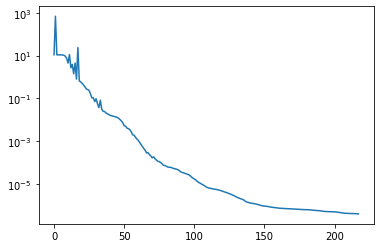

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.semilogy(Jvals)

Note: is you use the callback as above, the function evaluations at the _accepted_ optimisation iterates are stored in `obj.Jvals`. That way you obtain a monotone curve in the plot. Before running a new optimisation problem, you can clear this array by calling `obj.clear_history()`.

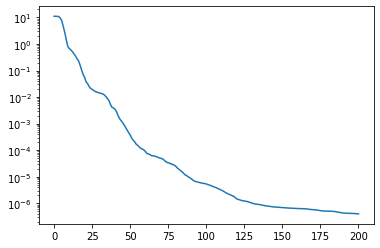

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.semilogy(obj.Jvals)